# Day 08. Exercise 05
# Clustering

## 0. Imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [8]:
df = pd.read_csv('data/regression.csv', index_col=0).drop('pageviews', axis=1)
df

,num_commits,AVG(diff)
uid,,
user_1,62,-64.400000
user_10,20,-74.800000
user_14,61,-159.000000
user_17,51,-61.600000
user_18,5,-5.666667
user_19,118,-98.750000
user_21,65,-95.500000
user_25,79,-92.600000
user_28,60,-86.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [9]:
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(df)


KMeans(n_clusters=3, random_state=21)

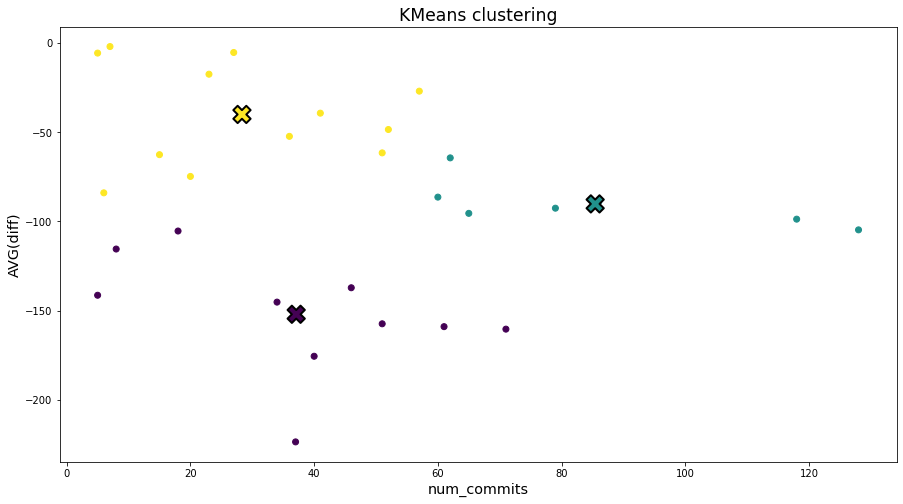

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['AVG(diff)'], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300,
           c=np.arange(kmeans.n_clusters), marker='X', linewidths=2,
           edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('AVG(diff)', fontsize='x-large')
ax.set_title('KMeans clustering', fontsize='xx-large')
plt.show()

In [14]:
silhouette_score(df, kmeans.labels_)

0.43901709571532954

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

In [15]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(df)

DBSCAN(eps=20, min_samples=2)

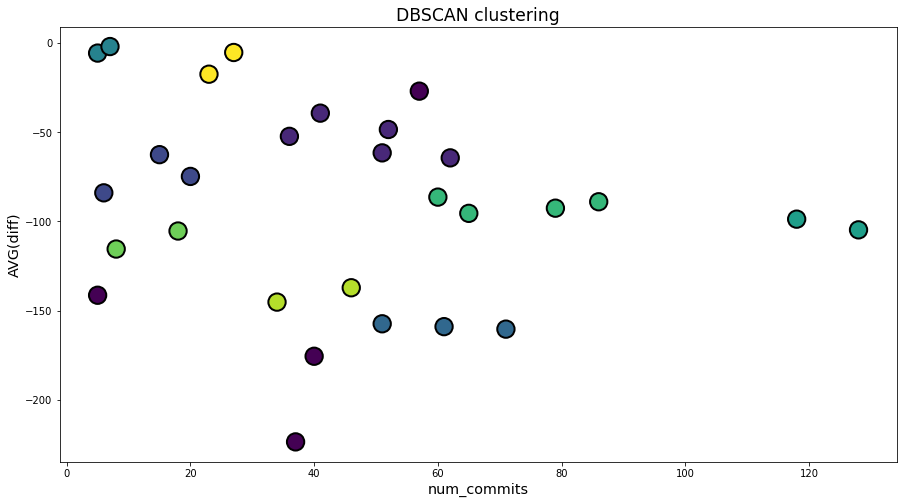

In [17]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['AVG(diff)'], s=300, c=dbscan.labels_,
           linewidths=2, edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('AVG(diff)', fontsize='x-large')
ax.set_title('DBSCAN clustering', fontsize='xx-large')
plt.show()

In [18]:
silhouette_score(df, dbscan.labels_)

0.38339641455696616

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

In [19]:
ward = AgglomerativeClustering(n_clusters=5)
ward.fit(df)

AgglomerativeClustering(n_clusters=5)

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(df['num_commits'], df['avg(diff)'], s=300, c=ward.labels_,
           linewidths=2, edgecolors='k')
ax.set_xlabel('num_commits', fontsize='x-large')
ax.set_ylabel('avg(diff)', fontsize='x-large')
ax.set_title('Agglomerative clustering', fontsize='xx-large')
plt.show()

In [20]:
silhouette_score(df, ward.labels_)

0.46383015199381467

In [21]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]
                                     ).astype(float)
    dendrogram(linkage_matrix, **kwargs)

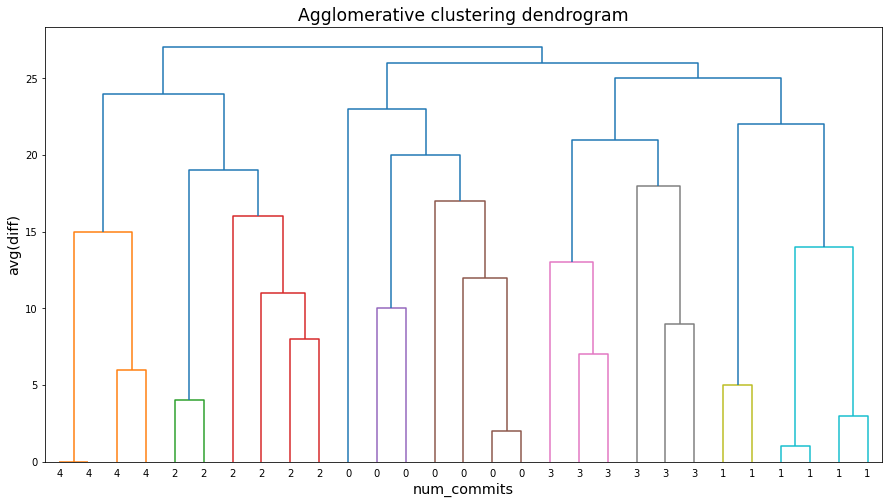

In [22]:
plt.rcParams['figure.figsize'] = (15, 8)
plot_dendrogram(ward, labels=ward.labels_)
plt.xticks(rotation='horizontal')
plt.xlabel('num_commits', fontsize='x-large')
plt.ylabel('avg(diff)', fontsize='x-large')
plt.title('Agglomerative clustering dendrogram', fontsize='xx-large')
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [23]:
def scorer(estimator, X):
    estimator.fit(X)
    return silhouette_score(X, estimator.labels_)

In [27]:
def plot_clustering(estimator, param, values):
    param_grid = {param: values}
    cv = GridSearchCV(estimator, param_grid, scoring=scorer, n_jobs=-1, cv=3)
    cv.fit(df)
    print(f'Best {param} value: {cv.best_params_[param]}')
    fig, axes = plt.subplots(1, 2, figsize=(15, 8), tight_layout=True)
    axes[0].plot(values, cv.cv_results_['mean_test_score'])
    axes[0].set_xlabel(param)
    axes[0].set_ylabel('silhouette_score')
    axes[0].set_title('Silhouette plot')
    axes[1].scatter(df['num_commits'], df['AVG(diff)'], s=300,
                    c=cv.best_estimator_.labels_, linewidths=2, edgecolors='k')
    axes[1].set_xlabel('num_commits')
    axes[1].set_ylabel('AVG(diff)')
    axes[1].set_title('Clusters')
    plt.show()

In [28]:
kmeans = KMeans(random_state=21)

Best n_clusters value: 3


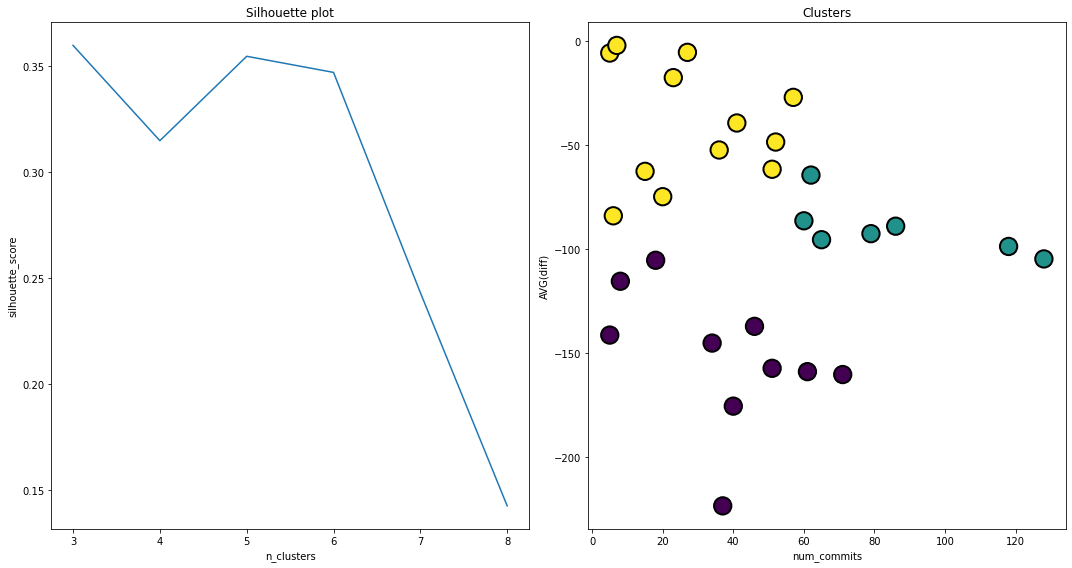

In [29]:
plot_clustering(kmeans, 'n_clusters', np.arange(3, 9))